# 作業:
    請嘗試改用CIFAR100

# Import Library

In [2]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

50000 labelled examples (500 per class) are provided for training
with a further 10000 unlabelled examples (100 per class) used for testing.
Each images has 3 RGB colour channels and pixel dimensions 32×32 for an overall size per input of 3×32×32=3072.

100 Object labels : 

--------------------------------------------------------------------------
beaver, dolphin, otter, seal, whale, 
aquarium fish, flatfish, ray, shark, trout, 
orchids, poppies, roses, sunflowers, tulips, 
bottles, bowls, cans, cups, plates, 
apples, mushrooms, oranges, pears, sweet peppers, 
clock, computer keyboard, lamp, telephone, television, 
bed, chair, couch, table, wardrobe, 
bee, beetle, butterfly, caterpillar, cockroach, 
bear, leopard, lion, tiger, wolf, 
bridge, castle, house, road, skyscraper, 
cloud, forest, mountain, plain, sea, 
camel, cattle, chimpanzee, elephant, kangaroo, 
fox, porcupine, possum, raccoon, skunk, 
crab, lobster, snail, spider, worm, 
baby, boy, girl, man, woman, 
crocodile, dinosaur, lizard, snake, turtle, 
hamster, mouse, rabbit, shrew, squirrel, 
maple, oak, palm, pine, willow, 
bicycle, bus, motorcycle, pickup truck, train, 
lawn-mower, rocket, streetcar, tank, tractor

---------------------------------------------------------------------

In [3]:
(x_img_train,y_label_train), (x_img_test, y_label_test)=cifar100.load_data()

169009152/169001437 [==============================] - 243s 1us/step


In [44]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))
print('x img train shape :' ,x_img_train.shape)
print('y label train shape : ', y_label_train.shape)
print('y label counts :',len(np.unique(y_label_train)))

train: 50000
test : 10000
x img train shape : (50000, 32, 32, 3)
y label train shape :  (50000, 1)
y label counts : 100


In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_images_labels_prediction(images, labels, idx, prediction=None, num=20):
    fig = plt.figure(figsize=(12, 14))
    if num > 25:
        num = 25 
    for i in range(idx, idx+num):
        ax = plt.subplot(5, 5, i - idx + 1)
        ax.imshow(images[i], cmap='binary')
        
        title = f"idx={i}, label={labels[i][0]}"
        if prediction is not None:
            title += f" => {prediction[i]}"
            
        ax.set_title(title, fontsize=13) 
        ax.set_xticks([])
        ax.set_yticks([])        
    plt.show()

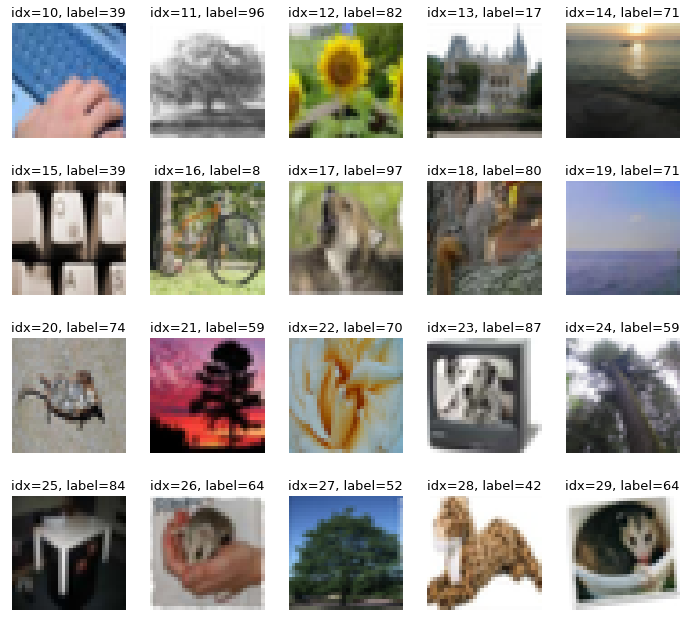

In [37]:
plot_images_labels_prediction(x_img_train, y_label_train, idx=10)

# Image normalize 

In [5]:
# It is most common to use 32-bit precision when training a neural network, 
# so at one point the training data will have to be converted to 32 bit floats. 
# Since the dataset fits easily in RAM, we might as well convert to float immediately.

x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [13]:
x_img_train_normalize[115][0][0]

array([0.38039216, 0.43529412, 0.6745098 ], dtype=float32)

# 轉換label 為OneHot Encoding

In [14]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [15]:
y_label_train_OneHot.shape

(50000, 100)

In [19]:
y_label_test_OneHot.shape

(10000, 100)